### Modified trapezoidal quadrature rule

Applying a modified trapezoidal quadrature rule to estimate the integral of $f(x) = e^{-x^2} sin^2(x)$ and to analyze the accuracy of the approximation as the value of N increases.

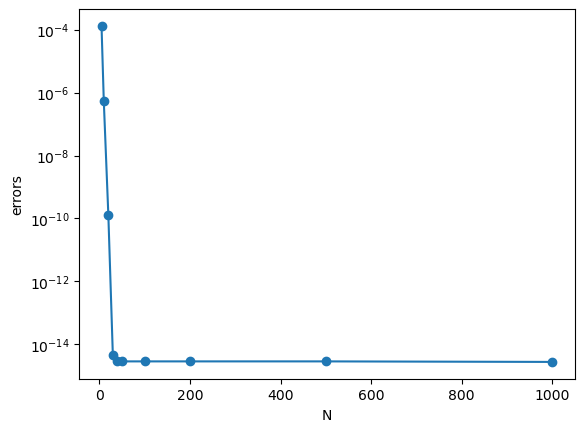

In [3]:
import numpy as np
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt


def main_func(x):
    x = np.array(x)
    return(np.exp(-(x**2))* ((np.sin(x))**2))


def Q(n):
    h = 1 / np.sqrt(n)
    x_vals = []
    for i in range(-n, n+1):
        x_vals.append(i*h)
    total = h * np.sum(main_func(x_vals))
    return(total)
        

N = [5, 10, 20, 30, 40, 50, 100, 200, 500, 1000]

actual_integral, _ = quad(main_func, -np.inf, np.inf)

error = []
for n in N:
    estimate = Q(n)
    e = abs(actual_integral - estimate)
    error.append(e)


plt.semilogy(N, error, marker = 'o')
plt.xlabel("N")
plt.ylabel("errors")
plt.show()
    
    

Observation: The modified trapezoidal rule produces highly accurate approximations of the integral for moderate N, as shown by the rapid decrease in the error. As the value of N increases, there is an exponential error decay, demonstrating the effectiveness of the quadrature rule.

### Gaussian quadrature rule

Implementing and analyzing the compostie Gaussian quadrature rule with variable subinterval scaling $q$, for accurately integrating the function $f(x) = x^{0.1} log(x)$ over the interval (0, 1], and determine the best choice of $q$ based on the convergance behaviour of the error.

In [7]:

import numpy as np

def composite_gauss(f, n, L, q):
    x, w = np.polynomial.legendre.leggauss(n)
    result = 0.0

    
    intervals = [q**(L - k - 1) for k in range(L)] + [1]
    intervals.insert(0, 0)  # Adding 0 as the starting point

    for i in range(L):
        a = intervals[i]
        b = intervals[i + 1]
        
        mid = (a + b) / 2
        h = (b - a) / 2

        for j in range(n):
            result += w[j] * f(mid + h * x[j])

        result *= h

    return result

def fun(x):
    return x**m


L = 4  
q = 0.5  
n = 3  

for m in range(3):  
    print(composite_gauss(fun, n, L, q))


0.566650390625
0.3991851806640625
0.3009249369303385


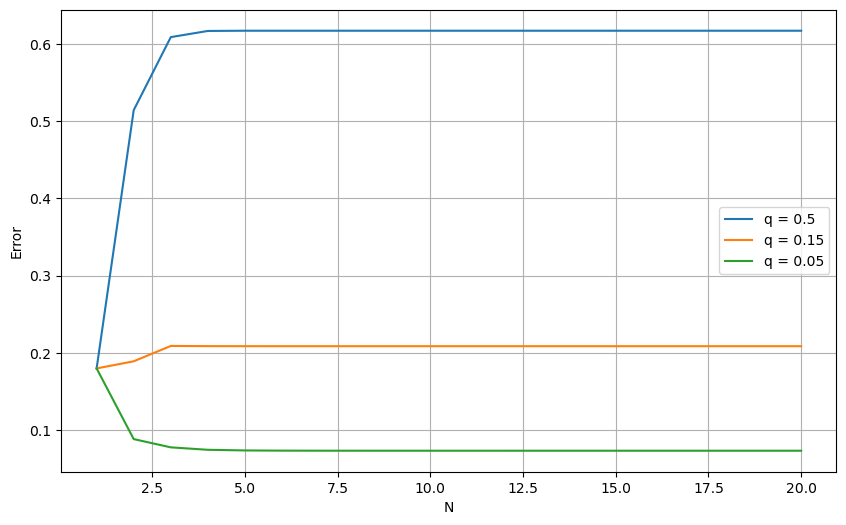

In [8]:
import numpy as np
import matplotlib.pyplot as plt

exact_value = -1 / (1.1 ** 2)

def integrand(x):
    return (x**0.1 * np.log(x))


plt.figure(figsize=(10, 6))

q_values = [0.5, 0.15, 0.05]
n = 20
for q in q_values:
    errors = []
    n_values = list(range(1, n + 1))
    
    for i in n_values:
        approx_value = composite_gauss(integrand, i, i, q)
        error = abs(exact_value - approx_value)
        errors.append(error)
    
    plt.plot(n_values, errors, label=f'q = {q}')

plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()




In [9]:
def C_b(errors, n):
    log_e = np.log(errors)
    coeff = np.polyfit(n, log_e, 1)

    b = - coeff[0]
    C = np.exp(coeff[1])

    return(C, b)

for q in q_values:
    errors = []
    n_vals = list(range(1, n + 1))
    
    for i in n_vals:
        approx_value = composite_gauss(integrand, i, i, q)
        error = abs(exact_value - approx_value)
        errors.append(error)
    
    C, b = C_b(errors, n_vals)
    print(f"For q = {q}: C = {C:.2e}, b = {b:.2e}")


For q = 0.5: C = 4.65e-01, b = -2.01e-02
For q = 0.15: C = 1.99e-01, b = -3.36e-03
For q = 0.05: C = 9.17e-02, b = 1.61e-02


Observation: The composite Gaussian qudrature rule shows that smaller values of $q$ (in this case $q = 0.05$) provides significantly lower errors and faster convergence when compared to larger values of q. 

### Analysing the convergance and numerical stability of an iterative sequence approximating $\pi$

Minimum error index =  14
3.141592654807589 3.141592653589793


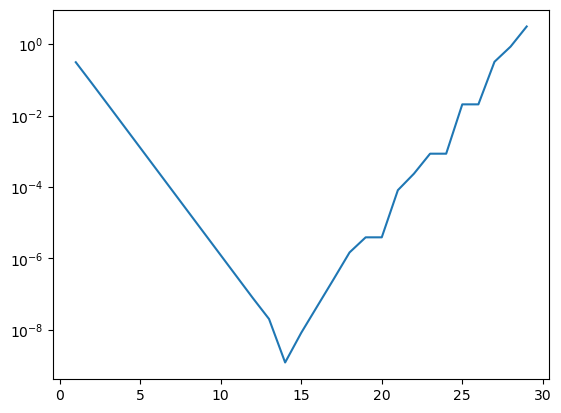

In [13]:
def u(k, ue):
    return((2**k)*(np.sqrt(2*(1-np.sqrt(1-((2**(-k)*ue)**2))))))


p = math.pi
us = [2]
err = []
for i in range(1, 30):
    us.append(u(i, us[i-1]))
    err.append(abs(p - us[-1]))
    #print(f"i = {i}, e = {err[-1]:.2e}")

print("Minimum error index = ", err.index(min(err)) + 1)
print(us[14], math.pi)
iss = list(range(1, 30))

plt.semilogy(iss, err)
    

Observation: The sequence $u_k$ converges rapidly to $\pi$ initially, achieving the minimal error at $k = 14$, after which the error increases. This error growth for larger k is probably due to numerical instabilities caused by the accumulation of round-off errors in the iterative formula, which is amplified by the exponential scaling with $2^k$